In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [0]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [0]:
model.summary()

In [7]:
# if network not trained before...
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False), 
              loss = tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

output = model.fit(x_train, y_train, 
                   epochs = 5,
                   validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2883 - accuracy: 0.1702 - val_loss: 2.2617 - val_accuracy: 0.3074
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1591 - accuracy: 0.4411 - val_loss: 1.8792 - val_accuracy: 0.6386
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0542 - accuracy: 0.7480 - val_loss: 0.5160 - val_accuracy: 0.8548
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4337 - accuracy: 0.8733 - val_loss: 0.3408 - val_accuracy: 0.8978
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3400 - accuracy: 0.8984 - val_loss: 0.2935 - val_accuracy: 0.9111


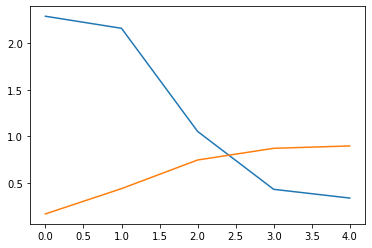

In [10]:
train_loss = output.history['loss']
train_acc = output.history['accuracy']

plt.plot(train_loss)
plt.plot(train_acc)
plt.show()

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.9111


[0.2935200333595276, 0.9110999703407288]

In [0]:
import cv2 as cv
img = cv.imread('4.jpg')
img = cv.resize(img, (28, 28))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img = img / 255.0
img = 1 - img

img = img.reshape(1, 28, 28, 1)

y_pred = model.predict(img)
print(y_pred)
print(np.argmax(y_pred))

[[2.55939590e-08 4.21577261e-06 4.60464406e-07 8.92376946e-08
  9.97719347e-01 1.61216008e-06 3.13902410e-06 1.04699975e-04
  2.16564187e-03 6.78430524e-07]]
4
